In [ ]:
%matplotlib inline
%load_ext memory_profiler

import os, sys, glob, re, math, pickle
import phate,scprep,magic,meld
import graphtools as gt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time,random,datetime
from sklearn import metrics
from sklearn import model_selection
from scipy import sparse
from scipy.stats import mannwhitneyu, tiecorrect, rankdata
from statsmodels.stats.multitest import multipletests
import scanpy as sc
import scvelo as scv
from adjustText import adjust_text
import warnings
from matplotlib import gridspec



# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
sc.set_figure_params(dpi=300,dpi_save=600,
                     frameon=False,
                     fontsize=9)
plt.rcParams['savefig.dpi']=600
sc.settings.verbosity=2
sc._settings.ScanpyConfig.n_jobs=-1
sns.set_style("ticks")


In [2]:

# fps
dfp = '/home/ngr4/project/scnd/data/'
pfp = '/home/ngr4/project/scnd/results/'
pdfp = '/home/ngr4/project/scnd/data/processed/'
sc.settings.figdir = pfp

def loader(fname,fpath,backed=None) : 
    start = time.time()
    adata = sc.read_h5ad(filename=os.path.join(fpath,fname),backed=backed)
    print('loaded @'+datetime.datetime.now().strftime('%y%m%d.%H:%M:%S'))
    print('took {:.2f}-s to load data'.format(time.time()-start))
    return adata

def writer(fname,fpath,AnnData) :
    start = time.time()
    Anndata.write(os.path.join(fpath,fname))
    print('saved @'+datetime.datetime.now().strftime('%y%m%d.%H:%M:%S'))
    print('took {:.2f}-s to save data'.format(time.time()-start))
    

if False :
    # load human
    fname='hum_MT_bbknn.h5ad'
    %memit hdata = loader(fname,pdfp)
    
if True :
    # load mouse
    fname='mouse_MT_bbknn.h5ad'
    %memit mdata = loader(fname,pdfp)


loaded @200411.20:17:07
took 145.03-s to load data
peak memory: 149455.25 MiB, increment: 149250.14 MiB


4.18-min


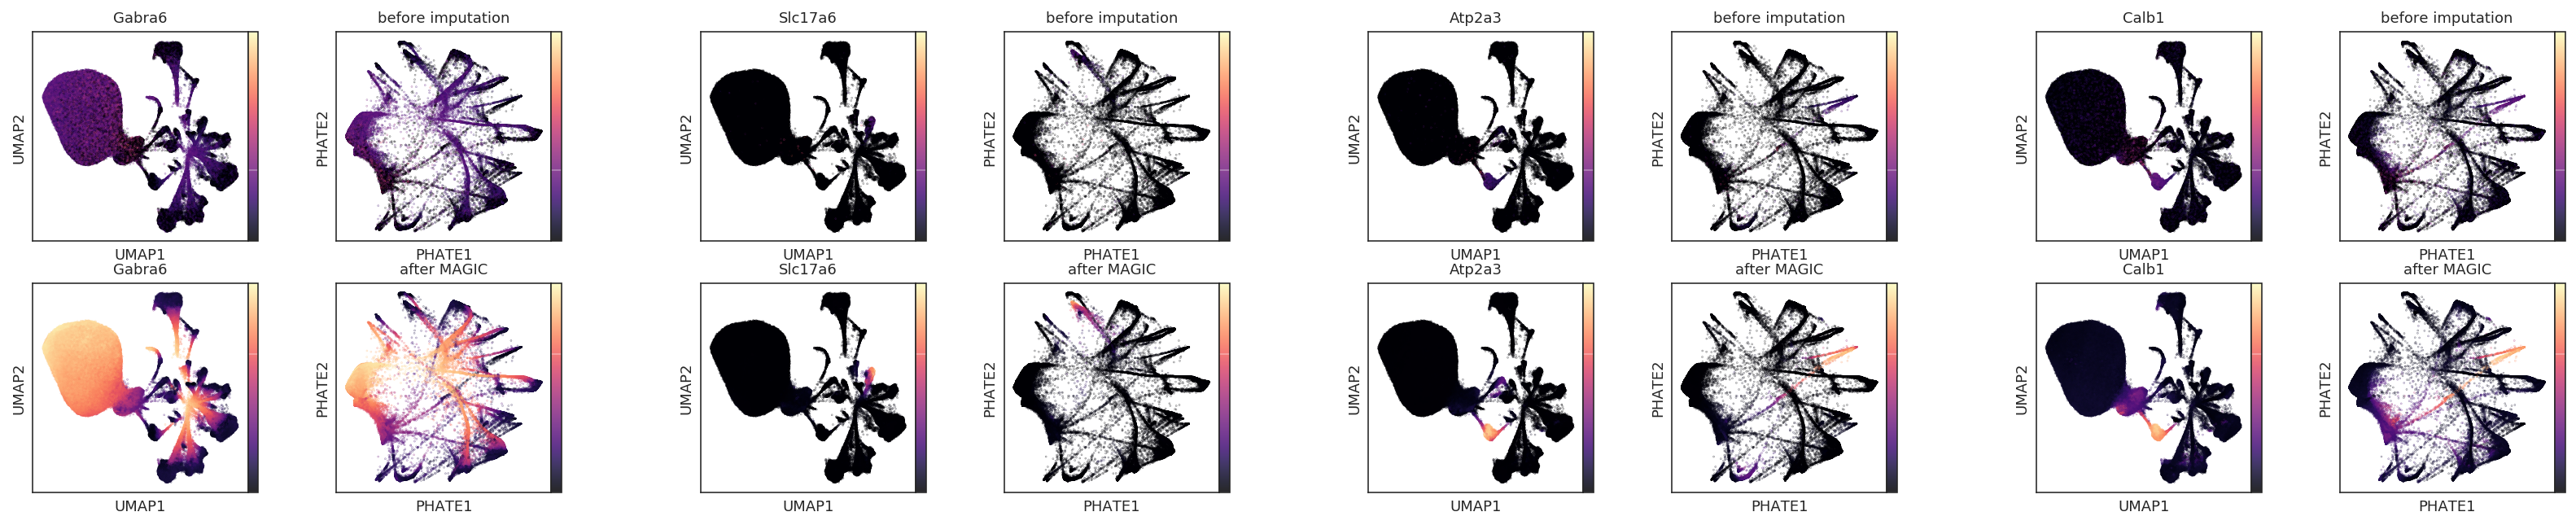

In [3]:
start = time.time()
genes = ['Gabra6','Slc17a6','Atp2a3','Calb1']
#          'Gad2','Ntn1','Aldh1l1','Gdf10',
#          'Pdgfra','Mag','Mog','Cx3cr1',
#          'Flt1','Rgs5','Dcn','Lum']

fig = plt.figure(figsize=(28,5))
gs = gridspec.GridSpec(1, 4, figure = fig)


for i,g in enumerate(genes):
    inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,
                                                  subplot_spec=gs[i])
    ax00 = fig.add_subplot(inner_grid[0,0])
    ax01 = fig.add_subplot(inner_grid[0,1])
    ax10 = fig.add_subplot(inner_grid[1,0])
    ax11 = fig.add_subplot(inner_grid[1,1])
    
    title = g
    data = mdata.obsm['X_umap'] #### MODIFY
    color = mdata[:,g].X
    im = ax00.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax00.set_title(title)
    ax00.set_xlabel('UMAP1')
    ax00.set_ylabel('UMAP2')
    ax00.set_xticks([])
    ax00.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax00,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'before imputation'
    data = mdata.obsm['X_phate'] #### MODIFY
    color = mdata[:,g].X
    im = ax01.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax01.set_title(title)
    ax01.set_xlabel('PHATE1')
    ax01.set_ylabel('PHATE2')
    ax01.set_xticks([])
    ax01.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax01,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    
    
    title = g
    data = mdata.obsm['X_umap'] #### MODIFY
    color = mdata[:,g].layers['imputed_bbknn']
    im = ax10.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax10.set_title(title)
    ax10.set_xlabel('UMAP1')
    ax10.set_ylabel('UMAP2')
    ax10.set_xticks([])
    ax10.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax10,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'after MAGIC'
    data = mdata.obsm['X_phate'] #### MODIFY
    color = mdata[:,g].layers['imputed_bbknn']
    im = ax11.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax11.set_title(title)
    ax11.set_xlabel('PHATE1')
    ax11.set_ylabel('PHATE2')
    ax11.set_xticks([])
    ax11.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax11,
                        ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
        
if True:
    fig.savefig(os.path.join(pfp,'embed_magic_mouse.pdf'),dpi=300,bbox_inches='tight')
    
print('{:.2f}-min'.format((time.time()-start)/60))

4.17-min


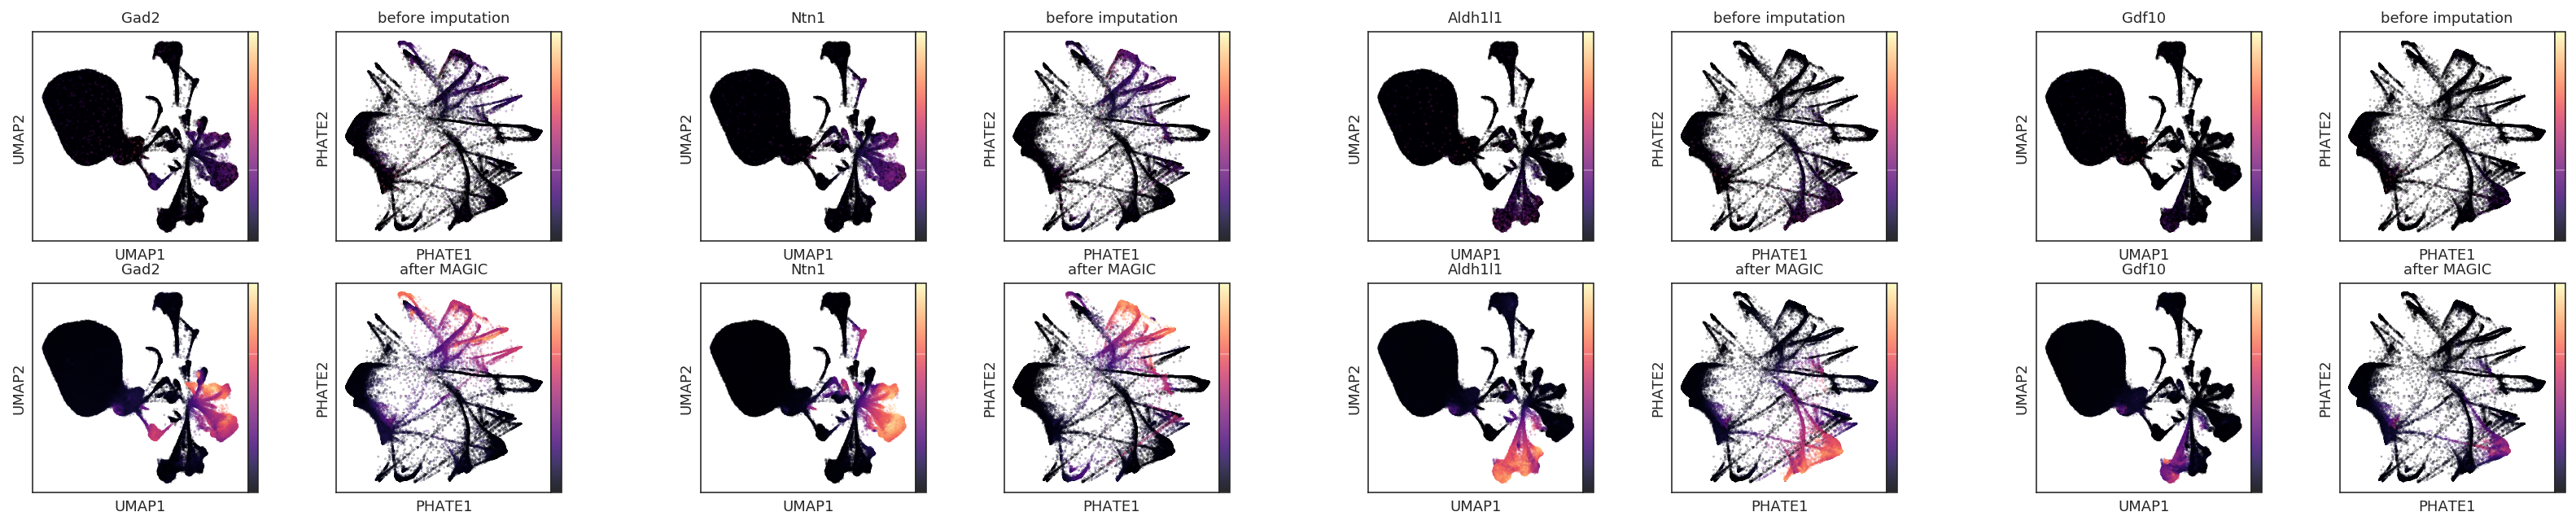

In [4]:
start = time.time()
genes = ['Gad2','Ntn1','Aldh1l1','Gdf10']
#          'Gad2','Ntn1','Aldh1l1','Gdf10',
#          'Pdgfra','Mag','Mog','Cx3cr1',
#          'Flt1','Rgs5','Dcn','Lum']

fig = plt.figure(figsize=(28,5))
gs = gridspec.GridSpec(1, 4, figure = fig)


for i,g in enumerate(genes):
    inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,
                                                  subplot_spec=gs[i])
    ax00 = fig.add_subplot(inner_grid[0,0])
    ax01 = fig.add_subplot(inner_grid[0,1])
    ax10 = fig.add_subplot(inner_grid[1,0])
    ax11 = fig.add_subplot(inner_grid[1,1])
    
    title = g
    data = mdata.obsm['X_umap'] #### MODIFY
    color = mdata[:,g].X
    im = ax00.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax00.set_title(title)
    ax00.set_xlabel('UMAP1')
    ax00.set_ylabel('UMAP2')
    ax00.set_xticks([])
    ax00.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax00,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'before imputation'
    data = mdata.obsm['X_phate'] #### MODIFY
    color = mdata[:,g].X
    im = ax01.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax01.set_title(title)
    ax01.set_xlabel('PHATE1')
    ax01.set_ylabel('PHATE2')
    ax01.set_xticks([])
    ax01.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax01,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    
    
    title = g
    data = mdata.obsm['X_umap'] #### MODIFY
    color = mdata[:,g].layers['imputed_bbknn']
    im = ax10.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax10.set_title(title)
    ax10.set_xlabel('UMAP1')
    ax10.set_ylabel('UMAP2')
    ax10.set_xticks([])
    ax10.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax10,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'after MAGIC'
    data = mdata.obsm['X_phate'] #### MODIFY
    color = mdata[:,g].layers['imputed_bbknn']
    im = ax11.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax11.set_title(title)
    ax11.set_xlabel('PHATE1')
    ax11.set_ylabel('PHATE2')
    ax11.set_xticks([])
    ax11.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax11,
                        ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
        
if True:
    fig.savefig(os.path.join(pfp,'embed_magic_mouse1.pdf'),dpi=300,bbox_inches='tight')
    
print('{:.2f}-min'.format((time.time()-start)/60))

4.36-min


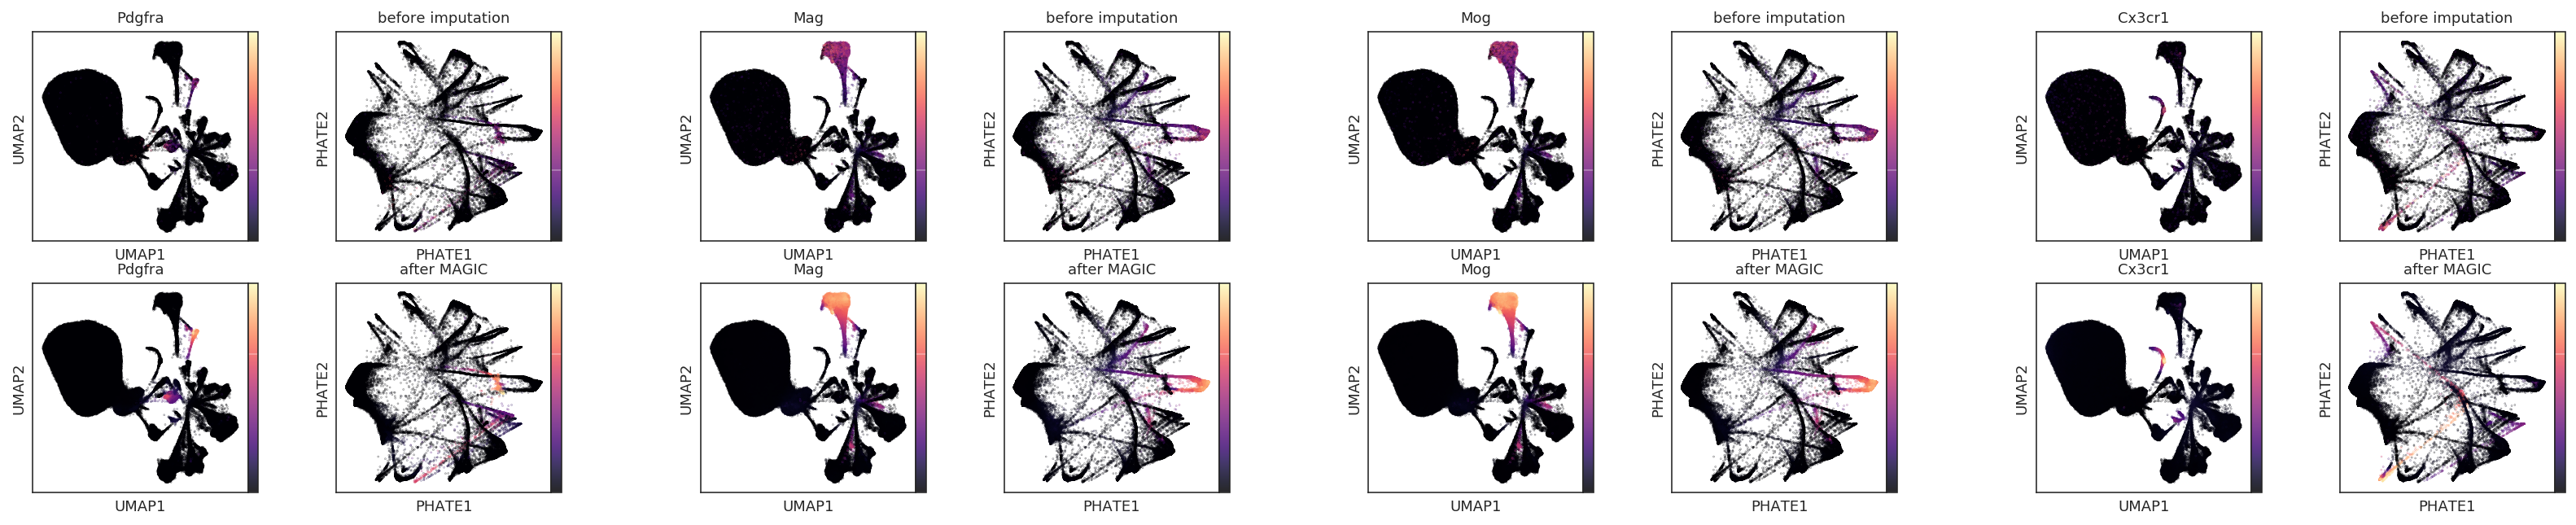

In [5]:
start = time.time()
genes = ['Pdgfra','Mag','Mog','Cx3cr1']
#          'Gad2','Ntn1','Aldh1l1','Gdf10',
#          'Pdgfra','Mag','Mog','Cx3cr1',
#          'Flt1','Rgs5','Dcn','Lum']

fig = plt.figure(figsize=(28,5))
gs = gridspec.GridSpec(1, 4, figure = fig)


for i,g in enumerate(genes):
    inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,
                                                  subplot_spec=gs[i])
    ax00 = fig.add_subplot(inner_grid[0,0])
    ax01 = fig.add_subplot(inner_grid[0,1])
    ax10 = fig.add_subplot(inner_grid[1,0])
    ax11 = fig.add_subplot(inner_grid[1,1])
    
    title = g
    data = mdata.obsm['X_umap'] #### MODIFY
    color = mdata[:,g].X
    im = ax00.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax00.set_title(title)
    ax00.set_xlabel('UMAP1')
    ax00.set_ylabel('UMAP2')
    ax00.set_xticks([])
    ax00.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax00,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'before imputation'
    data = mdata.obsm['X_phate'] #### MODIFY
    color = mdata[:,g].X
    im = ax01.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax01.set_title(title)
    ax01.set_xlabel('PHATE1')
    ax01.set_ylabel('PHATE2')
    ax01.set_xticks([])
    ax01.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax01,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    
    
    title = g
    data = mdata.obsm['X_umap'] #### MODIFY
    color = mdata[:,g].layers['imputed_bbknn']
    im = ax10.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax10.set_title(title)
    ax10.set_xlabel('UMAP1')
    ax10.set_ylabel('UMAP2')
    ax10.set_xticks([])
    ax10.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax10,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'after MAGIC'
    data = mdata.obsm['X_phate'] #### MODIFY
    color = mdata[:,g].layers['imputed_bbknn']
    im = ax11.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax11.set_title(title)
    ax11.set_xlabel('PHATE1')
    ax11.set_ylabel('PHATE2')
    ax11.set_xticks([])
    ax11.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax11,
                        ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
        
if True:
    fig.savefig(os.path.join(pfp,'embed_magic_mouse2.pdf'),dpi=300,bbox_inches='tight')
    
print('{:.2f}-min'.format((time.time()-start)/60))

4.33-min


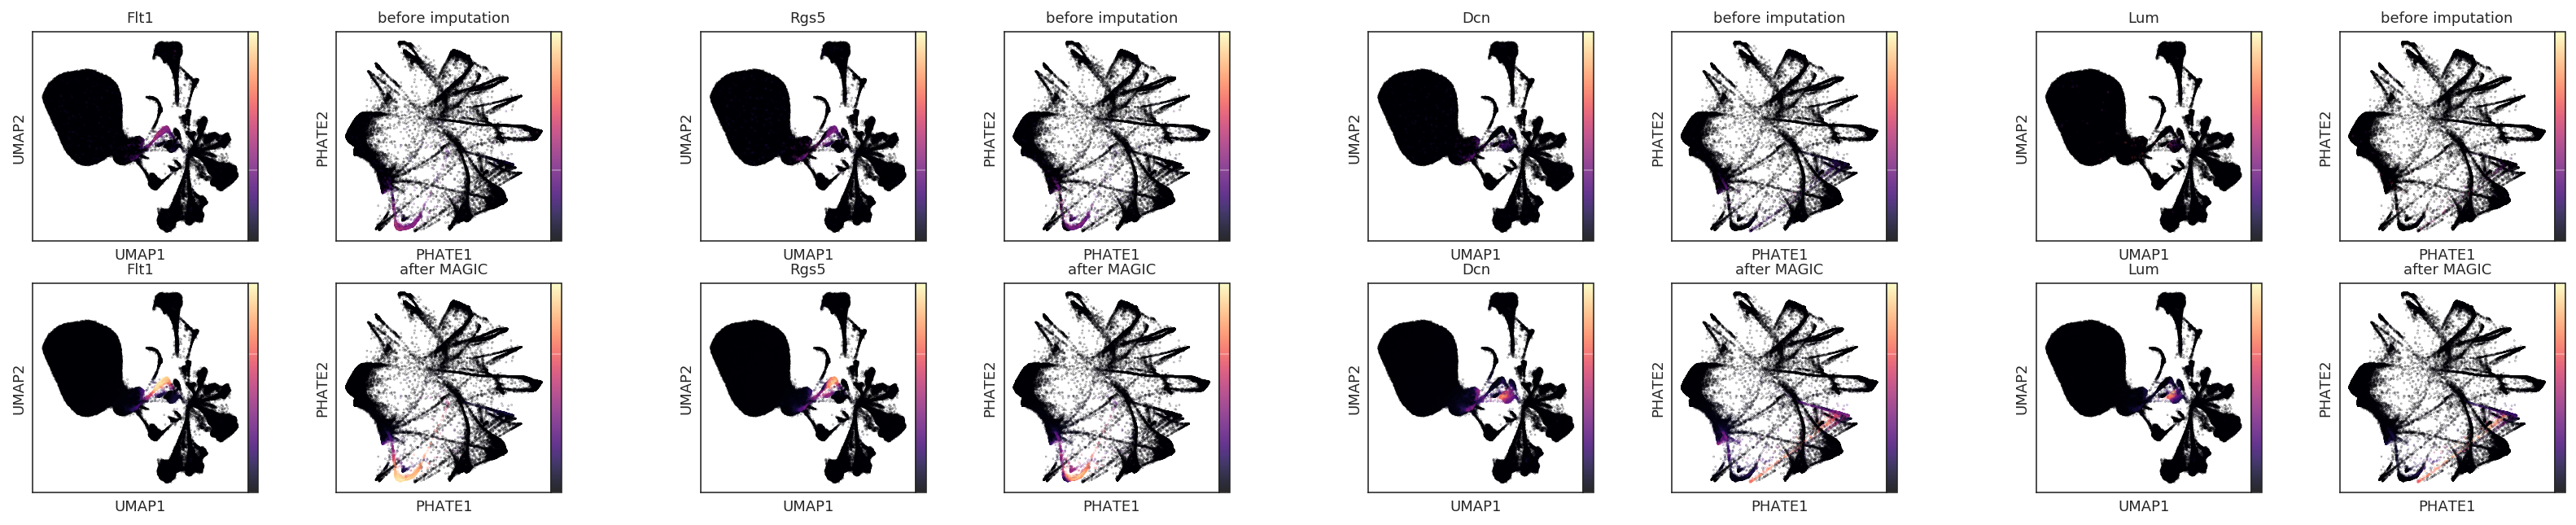

In [6]:
start = time.time()
genes = ['Flt1','Rgs5','Dcn','Lum']
#          'Gad2','Ntn1','Aldh1l1','Gdf10',
#          'Pdgfra','Mag','Mog','Cx3cr1',
#          'Flt1','Rgs5','Dcn','Lum']

fig = plt.figure(figsize=(28,5))
gs = gridspec.GridSpec(1, 4, figure = fig)


for i,g in enumerate(genes):
    inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,
                                                  subplot_spec=gs[i])
    ax00 = fig.add_subplot(inner_grid[0,0])
    ax01 = fig.add_subplot(inner_grid[0,1])
    ax10 = fig.add_subplot(inner_grid[1,0])
    ax11 = fig.add_subplot(inner_grid[1,1])
    
    title = g
    data = mdata.obsm['X_umap'] #### MODIFY
    color = mdata[:,g].X
    im = ax00.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax00.set_title(title)
    ax00.set_xlabel('UMAP1')
    ax00.set_ylabel('UMAP2')
    ax00.set_xticks([])
    ax00.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax00,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'before imputation'
    data = mdata.obsm['X_phate'] #### MODIFY
    color = mdata[:,g].X
    im = ax01.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax01.set_title(title)
    ax01.set_xlabel('PHATE1')
    ax01.set_ylabel('PHATE2')
    ax01.set_xticks([])
    ax01.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax01,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    
    
    title = g
    data = mdata.obsm['X_umap'] #### MODIFY
    color = mdata[:,g].layers['imputed_bbknn']
    im = ax10.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax10.set_title(title)
    ax10.set_xlabel('UMAP1')
    ax10.set_ylabel('UMAP2')
    ax10.set_xticks([])
    ax10.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax10,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'after MAGIC'
    data = mdata.obsm['X_phate'] #### MODIFY
    color = mdata[:,g].layers['imputed_bbknn']
    im = ax11.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax11.set_title(title)
    ax11.set_xlabel('PHATE1')
    ax11.set_ylabel('PHATE2')
    ax11.set_xticks([])
    ax11.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax11,
                        ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
        
if True:
    fig.savefig(os.path.join(pfp,'embed_magic_mouse3.pdf'),dpi=300,bbox_inches='tight')
    
print('{:.2f}-min'.format((time.time()-start)/60))

In [ ]:
#human

start = time.time()
genes = ['GABRA6','ATP2A3','CALB1','GAD2',
         'NTN1','ALDH1L1','GDF10','PDGFRA',
         'MAG','MOG','CX3CR1','FLT1',
         'RGS5']

fig = plt.figure(figsize=(28,20))
gs = gridspec.GridSpec(4, 4, figure = fig)


for i,g in enumerate(genes):
    inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,
                                                  subplot_spec=gs[i])
    ax00 = fig.add_subplot(inner_grid[0,0])
    ax01 = fig.add_subplot(inner_grid[0,1])
    ax10 = fig.add_subplot(inner_grid[1,0])
    ax11 = fig.add_subplot(inner_grid[1,1])
    
    title = g
    data = hdata.obsm['X_umap'] #### MODIFY
    color = hdata[:,g].X
    im = ax00.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax00.set_title(title)
    ax00.set_xlabel('UMAP1')
    ax00.set_ylabel('UMAP2')
    ax00.set_xticks([])
    ax00.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax00,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'before imputation'
    data = hdata.obsm['X_phate'] #### MODIFY
    color = hdata[:,g].X
    im = ax01.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax01.set_title(title)
    ax01.set_xlabel('PHATE1')
    ax01.set_ylabel('PHATE2')
    ax01.set_xticks([])
    ax01.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax01,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    
    
    title = g
    data = hdata.obsm['X_umap'] #### MODIFY
    color = hdata[:,g].layers['imputed_bbknn']
    im = ax10.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax10.set_title(title)
    ax10.set_xlabel('UMAP1')
    ax10.set_ylabel('UMAP2')
    ax10.set_xticks([])
    ax10.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax10,
                 ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
    
    title = 'after MAGIC'
    data = hdata.obsm['X_phate'] #### MODIFY
    color = hdata[:,g].layers['imputed_bbknn']
    im = ax11.scatter(data[:,0], data[:,1], 
                     s = 0.05, alpha = 0.6,
                     c = color,
                     cmap = 'magma', 
                     rasterized = True)
    ax11.set_title(title)
    ax11.set_xlabel('PHATE1')
    ax11.set_ylabel('PHATE2')
    ax11.set_xticks([])
    ax11.set_yticks([])
    if np.round(color.max())<=1:
        cmax = 1
    else: 
        cmax = np.round(color.max())
    cmin = np.round(color.min())
    cbar = fig.colorbar(im, pad=0, ax=ax11,
                        ticks = [])
#     cbar.ax.set_yticklabels([cmin,cmax])
        
if True:
    fig.savefig(os.path.join(pfp,'embed_magic_hum.pdf'),dpi=300,bbox_inches='tight')
    
print('{:.2f}-min'.format((time.time()-start)/60))